In [1]:
from datasets.mvtec import MVTecDataset
from models.detection.box_coders import HBoxCoder, BoxCoder

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
mvtec = MVTecDataset()

/workspace/datasets/mvtec.pth found, loading...


In [15]:
from PIL import Image, ImageDraw
from ops.boxes import obb2poly, obb2poly_np

In [6]:
image, target = mvtec[0]

In [24]:
from torchvision.transforms import functional as F
image_pil = F.to_pil_image(image)

In [27]:
draw = ImageDraw.Draw(image_pil)

for bbox, obox in zip(target["bboxes"], target["oboxes"]):
    draw.rectangle(bbox.tolist(), outline="red", width=5)
    obox = obox.unsqueeze(0)
    poly = obb2poly(obox)
    poly = poly.squeeze(0).tolist()
    draw.polygon(poly, outline="red", width=5)

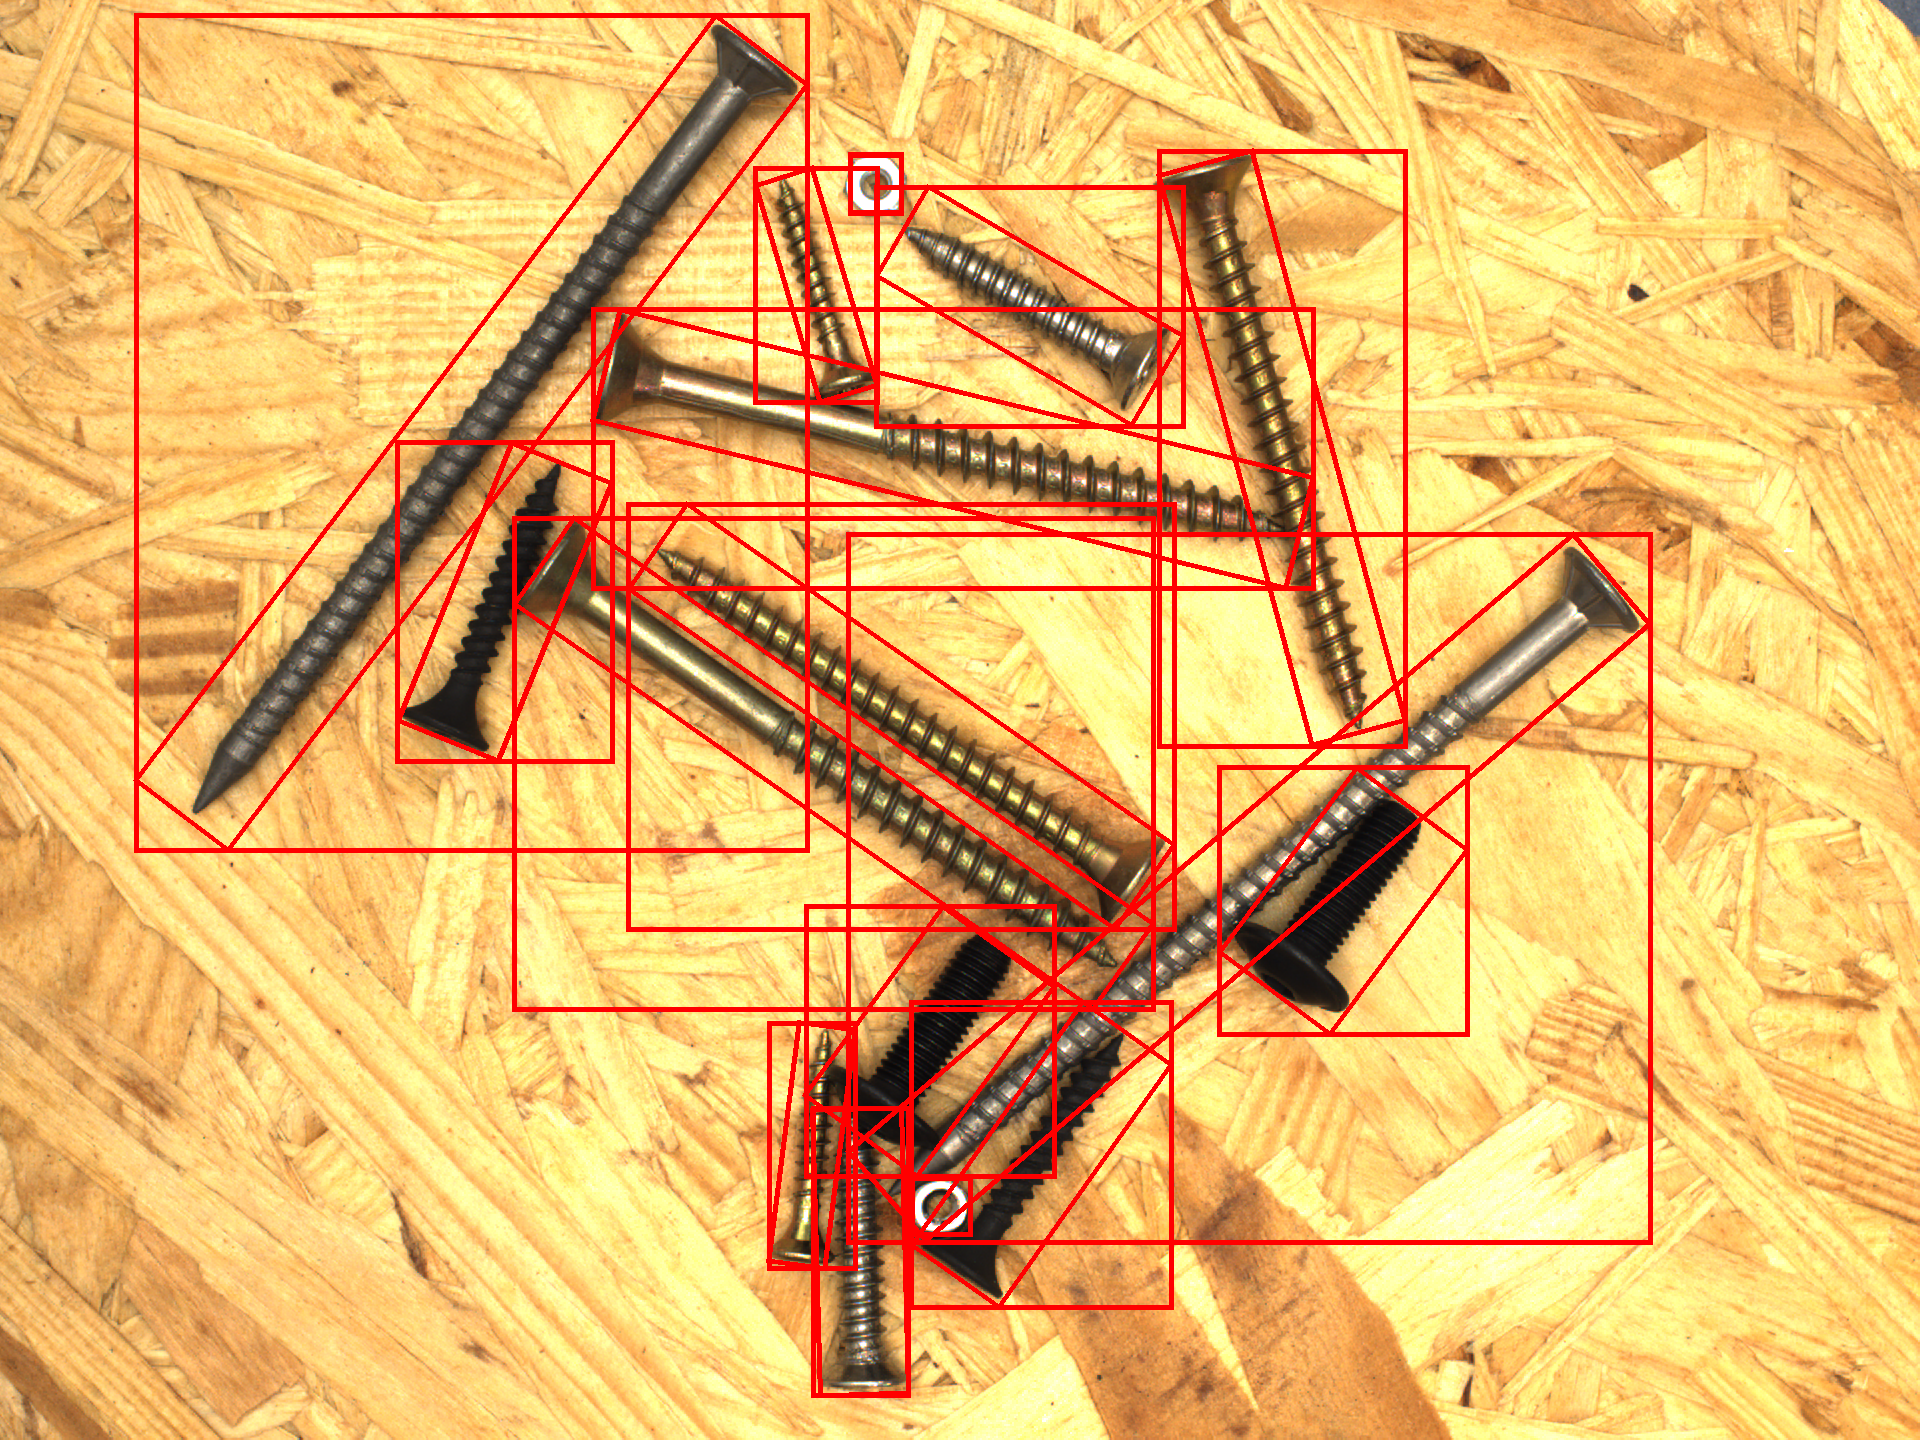

In [28]:
image_pil